# Vi börjar med att se hur målvariabeln Employed är fördelad.

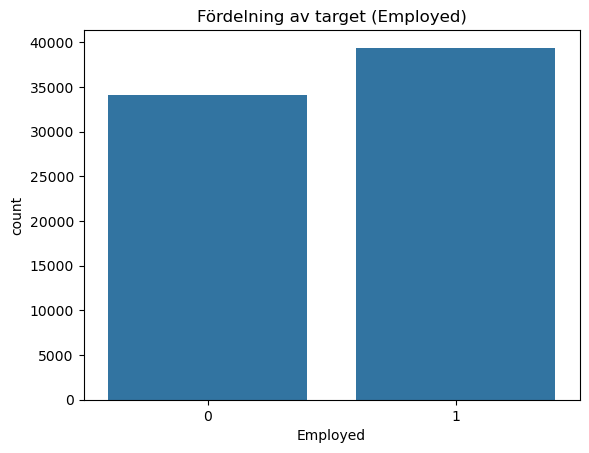

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("stackoverflow_full.csv")

sns.countplot(x="Employed", data=df)
plt.title("Fördelning av target (Employed)")
plt.show()

# MentalHealth & Accessibility Korrelation med anställning.

In [4]:
print(df.groupby("MentalHealth")["Employed"].mean())
print(df.groupby("Accessibility")["Employed"].mean())

MentalHealth
No     0.530170
Yes    0.557089
Name: Employed, dtype: float64
Accessibility
No     0.535309
Yes    0.567157
Name: Employed, dtype: float64


# Vilka kolumner kan tas bort?

In [5]:
df[["Gender","MentalHealth","Accessibility","HaveWorkedWith"]].info()
df[["Gender","MentalHealth","Accessibility","HaveWorkedWith"]].isna().mean()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73462 entries, 0 to 73461
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          73462 non-null  object
 1   MentalHealth    73462 non-null  object
 2   Accessibility   73462 non-null  object
 3   HaveWorkedWith  73399 non-null  object
dtypes: object(4)
memory usage: 2.2+ MB


Gender            0.000000
MentalHealth      0.000000
Accessibility     0.000000
HaveWorkedWith    0.000858
dtype: float64

# MainBranch (Dev vs NotDev) Kolla fördelning och anställningsgrad.

In [6]:
# MainBranch (Dev vs NotDev) Kolla fördelning och anställningsgrad.

MainBranch
Dev       0.917427
NotDev    0.082573
Name: proportion, dtype: float64
MainBranch
Dev       0.553089
NotDev    0.348830
Name: Employed, dtype: float64


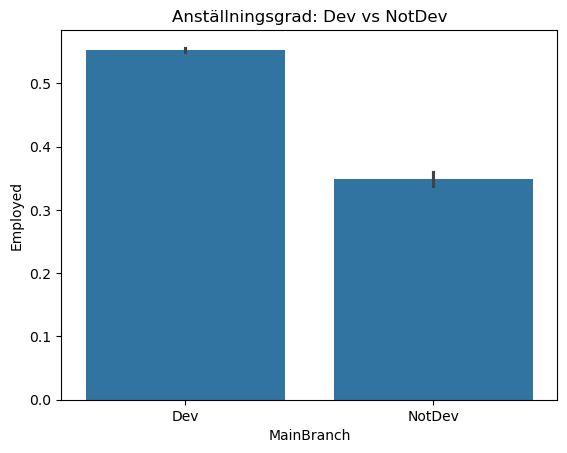

73462


In [7]:
print(df["MainBranch"].value_counts(normalize=True))
print(df.groupby("MainBranch")["Employed"].mean())
sns.barplot(x="MainBranch", y="Employed", data=df)
plt.title("Anställningsgrad: Dev vs NotDev")
plt.show()
print(df["MainBranch"].count())

# Se anställningsgrad per land och dominerande länder.

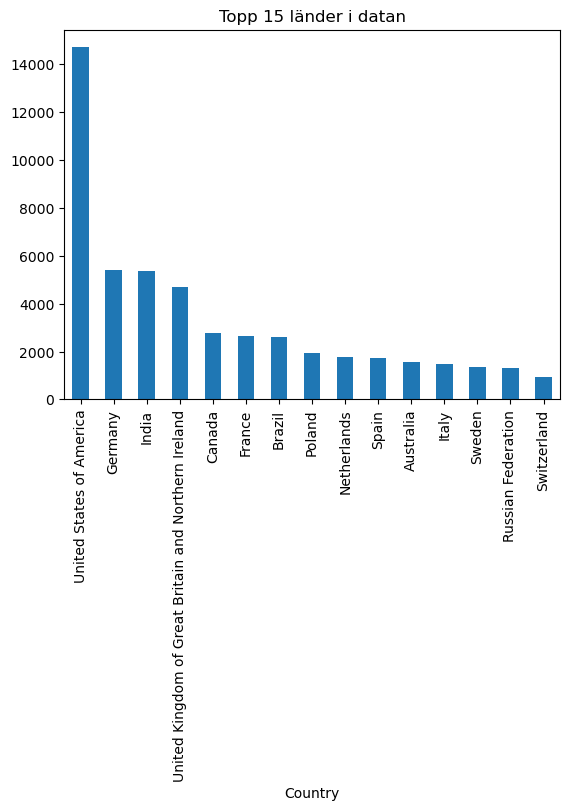

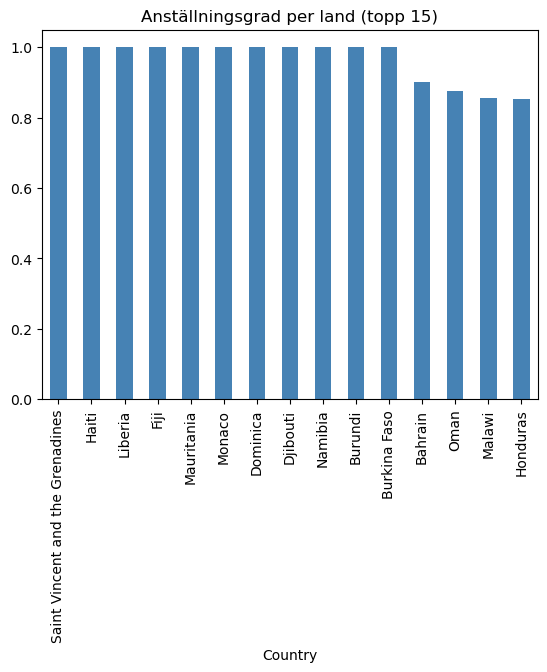

Antal länder i hela datasetet: 172
Antal länder med <2 rader: 24


In [8]:
top_countries = df['Country'].value_counts().head(15)
top_countries.plot(kind='bar')
plt.title("Topp 15 länder i datan")
plt.show()

hire_by_country = df.groupby('Country')["Employed"].mean()
hire_by_country.sort_values(ascending=False).head(15).plot(kind='bar', color='steelblue')
plt.title("Anställningsgrad per land (topp 15)")
plt.show()

antal_lander = df["Country"].nunique()
print("Antal länder i hela datasetet:", antal_lander)

low_count = df["Country"].value_counts()
print("Antal länder med <2 rader:", (low_count < 2).sum())



# Ålder vs YearsCode

Rader med <35 år men >35 års kod-erfarenhet: 4
       Age  YearsCode  YearsCodePro
34790  <35         50            50
52503  <35         50            20
57970  <35         40            36
62254  <35         41             8


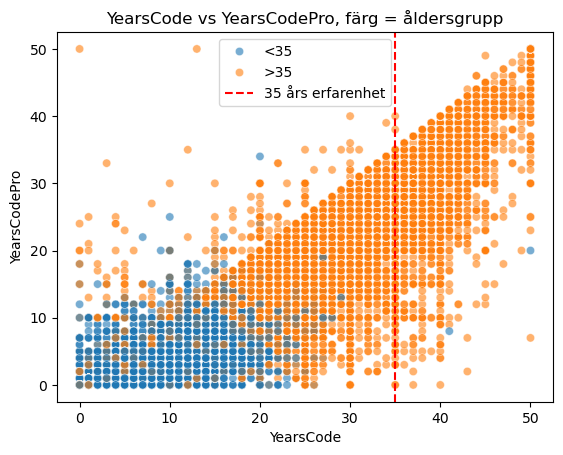

In [9]:
# rader som bryter mot regeln
mask = (df["Age"] == "<35") & (df["YearsCode"] > 35)
print("Rader med <35 år men >35 års kod-erfarenhet:", mask.sum())
print(df.loc[mask, ["Age", "YearsCode", "YearsCodePro"]].head())

# 2. Histogram per åldersgrupp
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x="YearsCode", y="YearsCodePro", hue="Age", alpha=0.6)
plt.axvline(35, color="red", linestyle="--", label="35 års erfarenhet")
plt.legend()
plt.title("YearsCode vs YearsCodePro, färg = åldersgrupp")
plt.show()

# YearsCode & YearsCodePro. Hur påverkar erfarenhet sannolikheten för anställning?

Rader där YearsCodePro > YearsCode: 588


/var/folders/66/n7t02x9n3px6n956yn182btr0000gn/T/ipykernel_47605/2963819999.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(exp_bins)["Employed"].mean().plot(kind="bar")


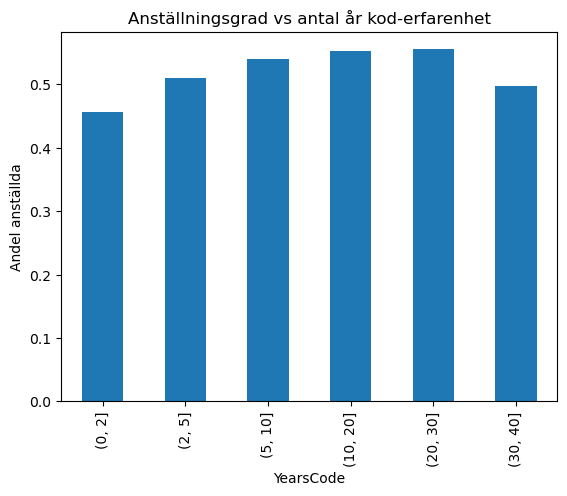

In [10]:
mask = df["YearsCodePro"] > df["YearsCode"]
print("Rader där YearsCodePro > YearsCode:", mask.sum())

exp_bins = pd.cut(df["YearsCode"], bins=[0,2,5,10,20,30,40])
df.groupby(exp_bins)["Employed"].mean().plot(kind="bar")
plt.ylabel("Andel anställda")
plt.title("Anställningsgrad vs antal år kod-erfarenhet")
plt.show()




# PreviousSalary normaliserad per land. För att jämföra löner oberoende av valuta.

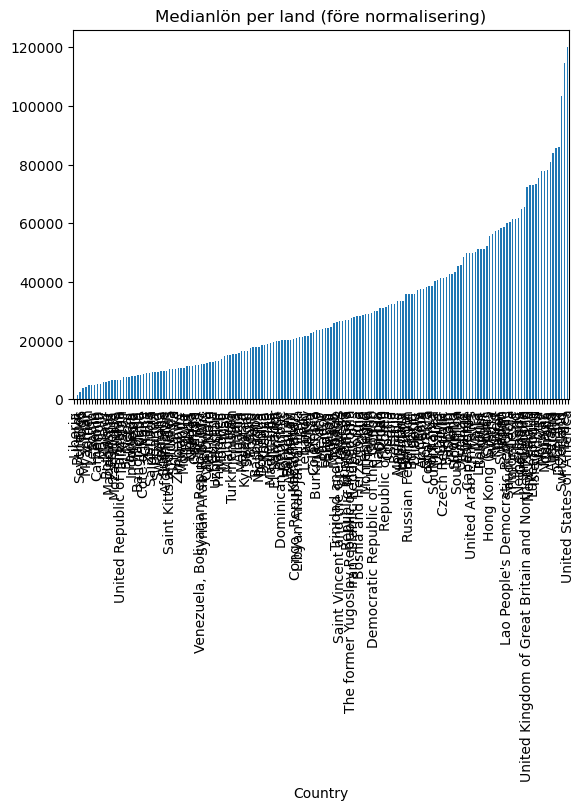

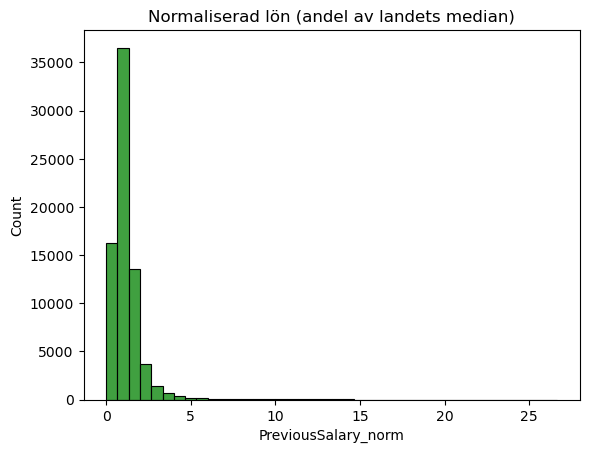

,PreviousSalary,PreviousSalary_norm
Country,,
Afghanistan,9792.0,1.0
Albania,15900.0,1.0
Algeria,8136.0,1.0
Andorra,75669.0,1.0
Angola,5256.0,1.0
Argentina,33600.0,1.0
Armenia,37620.0,1.0
Australia,84180.0,1.0
Austria,56521.0,1.0


In [11]:
df.groupby("Country")["PreviousSalary"].median().sort_values().plot(kind="bar")
plt.title("Medianlön per land (före normalisering)")
plt.show()

df["Country_original"] = df["Country"]

median_salary_by_country = df.groupby("Country")["PreviousSalary"].median()

df["PreviousSalary_norm"] = df.apply(
    lambda r: r["PreviousSalary"] / median_salary_by_country[r["Country"]],
    axis=1
)

sns.histplot(df["PreviousSalary_norm"], bins=40, color="green")
plt.title("Normaliserad lön (andel av landets median)")
plt.xlabel("PreviousSalary_norm")
plt.show()

df.groupby("Country")[["PreviousSalary", "PreviousSalary_norm"]].median().head(10)




# Antal tekniska skills (ComputerSkills) Samband mellan antal rapporterade färdigheter och anställning.

/var/folders/66/n7t02x9n3px6n956yn182btr0000gn/T/ipykernel_47605/2679016339.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(skill_bins)["Employed"].mean().plot(kind="bar", color="orange")


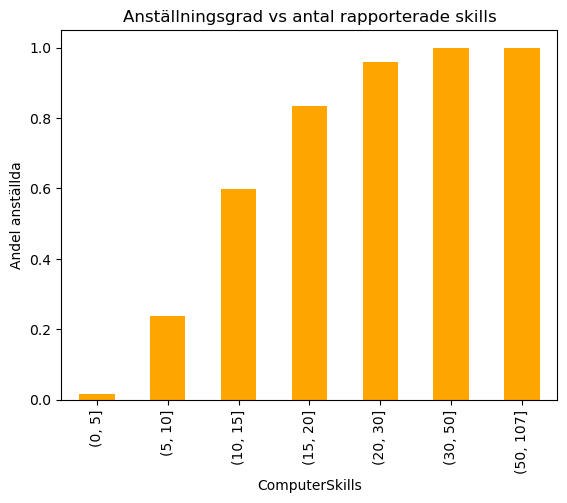

In [12]:
skill_bins = pd.cut(df["ComputerSkills"],
                    bins=[0,5,10,15,20,30,50,df["ComputerSkills"].max()])
df.groupby(skill_bins)["Employed"].mean().plot(kind="bar", color="orange")
plt.title("Anställningsgrad vs antal rapporterade skills")
plt.ylabel("Andel anställda")
plt.show()


# Korrelationer & dubbla variabler Kolla korskorrelation för risk för dubbelräkning.


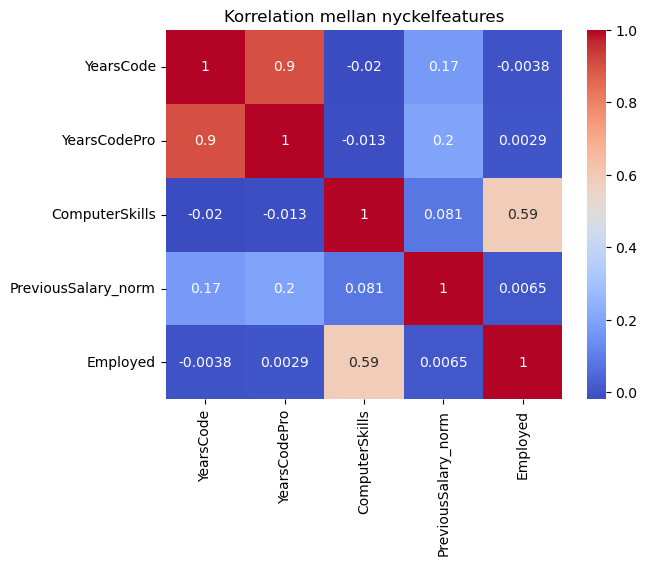

In [13]:
sns.heatmap(df[["YearsCode","YearsCodePro","ComputerSkills","PreviousSalary_norm","Employed"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Korrelation mellan nyckelfeatures")
plt.show()


# Kategoriska variabler som one-hot encodas

In [14]:
for col in ["Age","EdLevel","MainBranch","Country","Employment"]:
    print("\n", col)
    print(df[col].value_counts(dropna=False).head(10))


 Age
Age
<35    47819
>35    25643
Name: count, dtype: int64

 EdLevel
EdLevel
Undergraduate    37402
Master           18903
Other            10843
NoHigherEd        3706
PhD               2608
Name: count, dtype: int64

 MainBranch
MainBranch
Dev       67396
NotDev     6066
Name: count, dtype: int64

 Country
Country
United States of America                                14696
Germany                                                  5395
India                                                    5360
United Kingdom of Great Britain and Northern Ireland     4688
Canada                                                   2779
France                                                   2650
Brazil                                                   2624
Poland                                                   1922
Netherlands                                              1761
Spain                                                    1712
Name: count, dtype: int64

 Employment
Employment
1    6487